In [1]:
from scipy import signal
import numpy as np

In [25]:
#
# Copyright (c) 2011 Christopher Felton
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#

# The following is derived from the slides presented by
# Alexander Kain for CS506/606 "Special Topics: Speech Signal Processing"
# CSLU / OHSU, Spring Term 2011.

import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None,sub='111',title=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(sub)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')
    plt.title(title)

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

In [45]:
def polezero(z,p,filename=None,sub='111',title=None):
    """Plot the supplied poles and zeros.
    """

    # get a figure/plot
    ax = plt.subplot(sub)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    if (p is not None):
        t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
        plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
                  markeredgecolor='r', markerfacecolor='r')
    
    plt.title(title)

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    
    return z, p

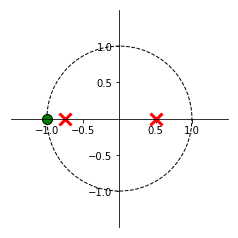

(array([-1.]), array([-0.75,  0.5 ]), 1.0)

In [21]:
#https://www.dsprelated.com/showcode/244.php
    
#from plot_zplane import zplane
b = np.array([0, 1, 1])
a = np.array([1, 1/4., -3/8.])
zplane(b,a)

The first two graphs should be identical, with poles at (r,w) =
(0.98, 0.2)
(0.98, 0.4)
(0.98, 0.45)
(0.96, 0.95)
and zeros at (r,w) =
(0.95, 0.3)
with reflection across the horizontal axis.


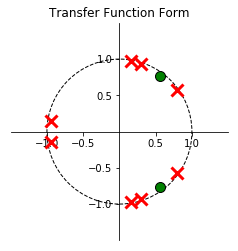

(array([0.55839599+0.76856614j, 0.55839599-0.76856614j]),
 array([-0.94818081+0.15017709j, -0.94818081-0.15017709j,
         0.79283665+0.57602955j,  0.79283665-0.57602955j,
         0.30283665+0.93203539j,  0.30283665-0.93203539j,
         0.15330578+0.96793457j,  0.15330578-0.96793457j]),
 0.817702032706393)

In [24]:
#https://octave.sourceforge.io/signal/function/zplane.html
    
## construct target system:
##   symmetric zero-pole pairs at r*exp(iw),r*exp(-iw)
##   zero-pole singletons at s
pw = np.array([0.2, 0.4, 0.45, 0.95])   # pw = [0.4];
pr = np.array([0.98, 0.98, 0.98, 0.96]) # pr = [0.85];
ps = np.array([])
zw = np.array([0.3])  # zw=[];
zr = np.array([0.95]) # zr=[];
zs = np.array([])


## system function for target system
p = np.concatenate((np.concatenate((pr, pr)) * np.exp(1j * np.pi * np.concatenate((pw, -pw))), ps))
z = np.concatenate((np.concatenate((zr, zr)) * np.exp(1j * np.pi * np.concatenate((zw, -zw))), zs))
M = len(z)
N = len(p)


#sys_a = [zeros(1, M-N), real(poly(p))];
sys_a = np.poly(p).real
#sys_b = [zeros(1, N-M), real(poly(z))];
sys_b = np.concatenate((np.zeros(N-M),np.poly(z).real))

print("The first two graphs should be identical, with poles at (r,w) =")
for x in zip(pr, pw): print(x) 
print("and zeros at (r,w) =")
for x in zip(zr, zw): print(x) #print (" (%.2f,%.2f)" % [zr, zw])
print("with reflection across the horizontal axis.")

#subplot (2, 3, 1);
zplane (sys_b, sys_a, title="Transfer Function Form")


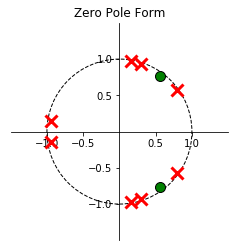

In [46]:
#subplot (2, 3, 2);
polezero (z, p, title="Zero Pole Form");

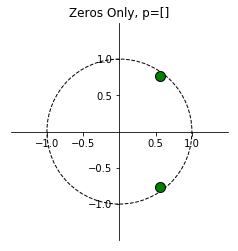

In [47]:
#subplot (2, 3, 3);
polezero (z, None, title="Zeros Only, p=[]");

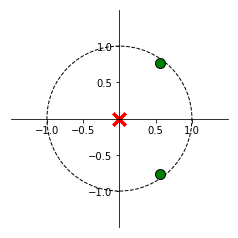

In [36]:
#subplot (2, 3, 4);
zplane (sys_b, np.array([1,0,0,0,0,0,0,0]), "Numerator Only, a=1");

The matrix plot has 2 sets of points, one inside the other


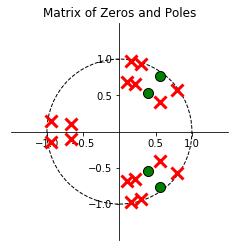

In [48]:
print ("The matrix plot has 2 sets of points, one inside the other");
#subplot (2, 3, 5);
polezero (np.concatenate((z, 0.7*z)), np.concatenate((p, 0.7*p)), title="Matrix of Zeros and Poles");